## Problem statement:
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

### Importing necessary libraries and reading the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Setting display option to show all columns
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("Credit_score.csv", low_memory=False)

### Finding basic charachteristics and performing EDA:

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [6]:
print('No.of Rows: ', df.shape[0])
print('No.of Columns: ', df.shape[1])

No.of Rows:  100000
No.of Columns:  27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


- In the numerical columns such as 'Num_Bank_Accounts', 'Interest_Rate', 'Num_Credit_Card' etc., the maximum values are way out of normal ranges for those columns. It clearly shows that there are some outliers.

In [9]:
df.describe(include = 'object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,3635,4,13178,404,3,91049,7,98790
top,0x25fd5,CUS_0x942c,January,Stevex,38,#F%$D@*&8,_______,17273.83,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9


**Observations:**
- There are 12500 unique customer IDs indicating that the data is of 12500 customers.
- There are only 8 different months. Need to analyze the data to find what's missing.
- There are 1788 unique age values which is not possible.
- There are 12501 Social Security Numbers for 12500 customers, which is not possible as there cannot be multiple SSN for a single citizen. And also the most frequent SSN is a random value.
- There are some special charachters in some columns which should be of a number. Need to clean those columns.

### Data Cleaning and Processing: Missing values, inconsistent values and outliers

In [10]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

#### 'Name' and 'Monthly_Inhand_Salary'

Let's fill the null values in 'Name' and 'Monthly_Inhand_Salary' columns using those values from same customer_id's.

In [11]:
df.sort_values(by=['Customer_ID', 'Month'], inplace=True)
df['Name'] = df.groupby('Customer_ID')['Name'].fillna(method='ffill').fillna(method='bfill')

In [12]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill').fillna(method='bfill')

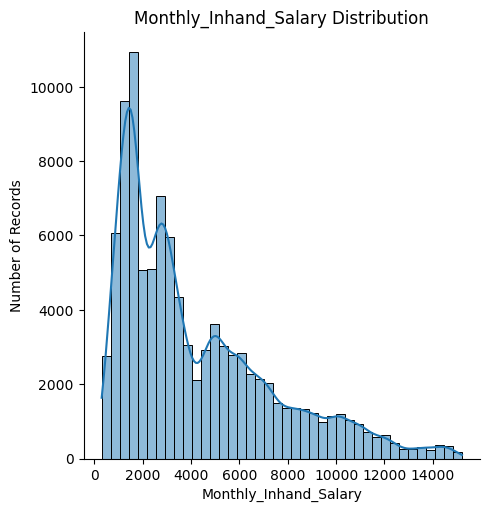

In [13]:
sns.displot(data=df, x=df['Monthly_Inhand_Salary'], kde=True, bins=40)
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Number of Records')
plt.title('Monthly_Inhand_Salary Distribution')
plt.xticks(rotation=0)
plt.show()

In [14]:
df['Month'].value_counts()

Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: count, dtype: int64

- There is no data in the months of September - December.

#### Feature: Age

In [15]:
# Finding all special characters in the Age column
special_characters = set()

for value in df['Age']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Age' column:", special_characters)

Special characters in the 'Age' column: {'-', '_'}


In [16]:
# Let's remove these special characters from the Age column
df['Age'] = df['Age'].str.replace(r'[_-]', '', regex=True)

In [17]:
# Convert the datatype of the column to int and remove the values that are less than 0 and greater than 120
df['Age'] = df['Age'].astype(int)
df['Age'] = df['Age'].where((df['Age'] >= 0) & (df['Age'] <= 120), pd.NA)

In [18]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))

In [19]:
df['Age'].value_counts()

Age
38.0     3071
28.0     3048
31.0     3035
26.0     3031
32.0     2966
36.0     2956
25.0     2954
27.0     2944
35.0     2937
39.0     2931
34.0     2918
44.0     2896
22.0     2892
19.0     2864
41.0     2861
20.0     2839
37.0     2832
29.0     2820
43.0     2813
30.0     2810
21.0     2789
24.0     2780
23.0     2726
45.0     2713
40.0     2690
42.0     2647
33.0     2624
18.0     2433
46.0     1672
15.0     1613
17.0     1553
16.0     1504
48.0     1424
49.0     1412
55.0     1398
53.0     1396
52.0     1387
54.0     1339
51.0     1331
50.0     1305
47.0     1254
14.0     1209
56.0      372
95.0        3
118.0       1
115.0       1
100.0       1
102.0       1
111.0       1
109.0       1
112.0       1
99.0        1
Name: count, dtype: int64

In [20]:
# Filtering the Ages that seem odd
df_filtered = df[df['Age'].isin([95, 118, 115, 100, 102, 111, 109, 112, 99])]

In [21]:
df_filtered.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
23230,0x9e1c,CUS_0x1647,July,Caroline Valetkevitchb,118.0,747-79-7877,Lawyer,28608.65,2490.054167,4,7,12,1_,Personal Loan,2,11,5.68,4.0,Good,143.04,35.532501,NaN,No,23.008446,65.5940138,High_spent_Medium_value_payments,410.4029567
78564,0x1e256,CUS_0x1dd3,May,Gerryg,95.0,936-83-6588,Manager,68484.44,5684.036667,5,7,5,5,"Home Equity Loan, Credit-Builder Loan, Persona...",12,20,12.52,8.0,Standard,105.41,28.430067,12 Years and 5 Months,NM,225.535667,220.0008064,High_spent_Small_value_payments,382.867193
81398,0x1f2f0,CUS_0x21ac,July,Ermanz,115.0,333-78-2654,Developer,55593.99,4874.832500,7,6,30,6,"Home Equity Loan, Payday Loan, Home Equity Loa...",18,20,16.09,11.0,Standard,1314.25,28.031205,18 Years and 5 Months,Yes,269.033234,248.5553232,High_spent_Small_value_payments,229.894693
29316,0xc1c6,CUS_0x3b9a,May,Seetharamanw,100.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,775,7.68,5.0,Standard,401.26,39.025723,14 Years and 5 Months,Yes,96.848591,28.76608943,High_spent_Large_value_payments,369.1149863
31288,0xcd56,CUS_0x4b64,January,Luke Bakerg,102.0,478-55-2676,Musician,38460.28,3241.023333,6,9,16,7,"Personal Loan, Personal Loan, Home Equity Loan...",56,16,20.71,11.0,Bad,4106.5,26.537577,6 Years and 1 Months,Yes,179.135821,267.3365048,Low_spent_Medium_value_payments,157.6300073


I examined the customer IDs with these higher ages and found that each customer ID has a different age in all its rows except for this outlier. Therefore, these outliers can be replaced with the mode values of their respective customer IDs.
All these are maximum values of those particular customer ages. So let's remove the max values using mode values.

In [22]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.replace(x.max(),x.mode().iloc[0]))

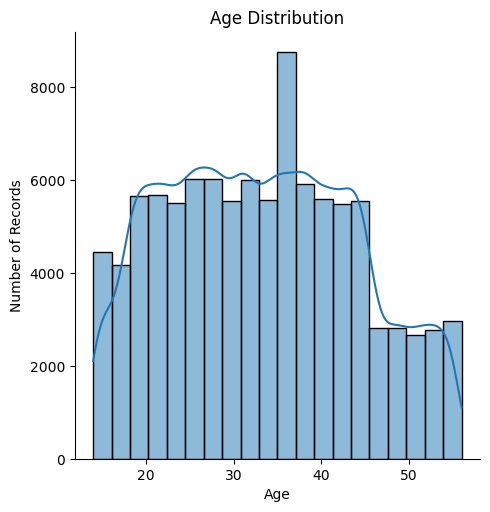

In [23]:
sns.displot(data=df, x=df['Age'], kde=True, bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Records')
plt.title('Age Distribution')
plt.xticks(rotation=0)
plt.show()

#### Feature: SSN(Social Security Number)

In SSN column a random value ('#F%$D@*&8') is repeated for 5572 rows. Let's replace those values with that of same customer IDs. 

In [24]:
df['SSN'] = df['SSN'].str.replace('_', '')

In [25]:
def replace_ssn(series):
    # Identify the actual SSN that is not the placeholder
    actual_ssn = series['SSN'][series['SSN'] != '#F%$D@*&8'].iloc[0]
    
    # Replace the placeholder SSN with the actual SSN
    series['SSN'] = series['SSN'].replace('#F%$D@*&8', actual_ssn)
    
    return series

In [26]:
df= df.groupby('Customer_ID').apply(replace_ssn).reset_index(drop=True)

#### Feature: Occupation

In [27]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [28]:
# Function to replace blank occupations with mode of the group
def replace_blank_occupation(series):
    # Calculate the mode of the Occupation within the group
    occupation_mode = series['Occupation'][series['Occupation'] != '_______'].mode().iloc[0]
    
    # Replace blank occupation with the mode
    series['Occupation'] = series['Occupation'].replace('_______', occupation_mode)
    
    return series

# Apply the function to each Customer_ID group
df = df.groupby('Customer_ID').apply(replace_blank_occupation).reset_index(drop=True)

In [29]:
df.describe(include = 'object')

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,100000,100000,100000,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800
unique,100000,12500,8,10139,12500,15,18940,434,6260,749,3635,4,13178,404,3,91049,7,98790
top,0xfaba,CUS_0xffd,April,Langep,832-88-8320,Lawyer,17273.83,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,8,12500,48,8,7096,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9


#### Feature: Annual_Income

In [30]:
df['Annual_Income'].isnull().sum()

np.int64(0)

There are no null values in the Annual_Income column.

In [31]:
# Finding all special characters in the Annual_Income column
special_characters = set()

for value in df['Annual_Income']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Annual_Income' column:", special_characters)

Special characters in the 'Annual_Income' column: {'.', '_'}


In [32]:
# Removing '_' from the Annual_Income' column
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

In [33]:
df['Annual_Income'] = df['Annual_Income'].astype('float64')

There are some rows where the annual income is unusually high, but for the same customers there are different income values in other rows. So, let's replace those values using mode values of each customer.

In [34]:
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.mode().iloc[0])

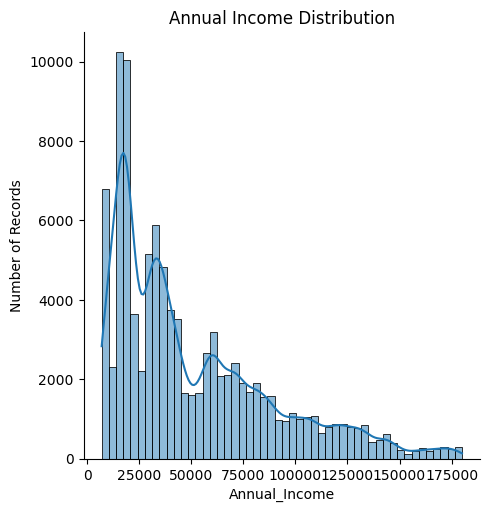

In [35]:
sns.displot(data=df, x=df['Annual_Income'], kde=True, bins=50)
plt.xlabel('Annual_Income')
plt.ylabel('Number of Records')
plt.title('Annual Income Distribution')
plt.xticks(rotation=0)
plt.show()

#### Feature: Num_Bank_Accounts

Replacing the values of 'Num_Bank_Accounts' values using Mode values of each customer.

In [36]:
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.mode().iloc[0])

In [37]:
df['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
 6     13184
 7     12976
 8     12936
 4     12392
 5     12272
 3     12096
 9      5512
 10     5328
 1      4552
 0      4368
 2      4352
-1        32
Name: count, dtype: int64

There are values -1 and 0 under Num_Bank_Accounts column. Replacing those values with 0 as -1 is not possible.

In [38]:
# Replacing the values -1 and 0 wih 0.
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: 0 if x <= 0 else x)

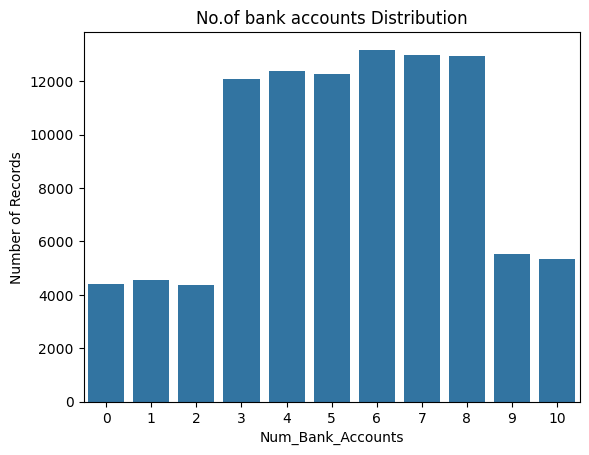

In [39]:
sns.countplot(data=df, x=df['Num_Bank_Accounts'])
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Number of Records')
plt.title('No.of bank accounts Distribution')
plt.xticks(rotation=0)
plt.show()

- There are some outliers,negative values in Num_Bank_Accounts column.
- After cleaning, there are 11 possible value in this column.
- Num Bank Accounts ranging from 0 to 10.
- Majority ofthe customers has no.of bank accounts between 3 to 8.

#### Feature: Num_Credit_Card

In [40]:
df['Num_Credit_Card'].value_counts()

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
1253        1
771         1
1057        1
438         1
312         1
Name: count, Length: 1179, dtype: int64

Replacing the values of 'Num_Credit_Card' values using Mode values of each customer, as there are certain values that are generally not possible like having 100s of credit cards.

In [41]:
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.mode().iloc[0])

In [42]:
df['Num_Credit_Card'].value_counts()

Num_Credit_Card
5     18904
7     16984
6     16960
4     14336
3     13576
8      5096
10     4960
9      4736
2      2208
1      2184
11       40
0        16
Name: count, dtype: int64

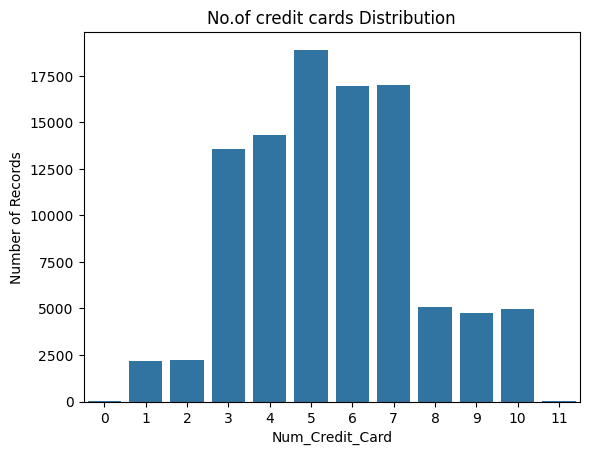

In [43]:
sns.countplot(data=df, x=df['Num_Credit_Card'])
plt.xlabel('Num_Credit_Card')
plt.ylabel('Number of Records')
plt.title('No.of credit cards Distribution')
plt.xticks(rotation=0)
plt.show()

- There are some outliers,negative values in Num_Credit_Card column.
- After cleaning, there are 12 possible value in this column.
- Num Bank Accounts ranging from 0 to 11.
- Majority of the customers has no.of bank accounts between 3 to 7.

#### Feature: Interest_Rate

In [44]:
df['Interest_Rate'].value_counts()

Interest_Rate
8       5012
5       4979
6       4721
10      4540
12      4540
        ... 
4805       1
4662       1
4797       1
5473       1
3878       1
Name: count, Length: 1750, dtype: int64

Replacing the values of 'Interest_Rate' values using Mode values of each customer, as there are certain values that are generally not possible like an interest rate of 4805.

In [45]:
df['Interest_Rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.mode().iloc[0])

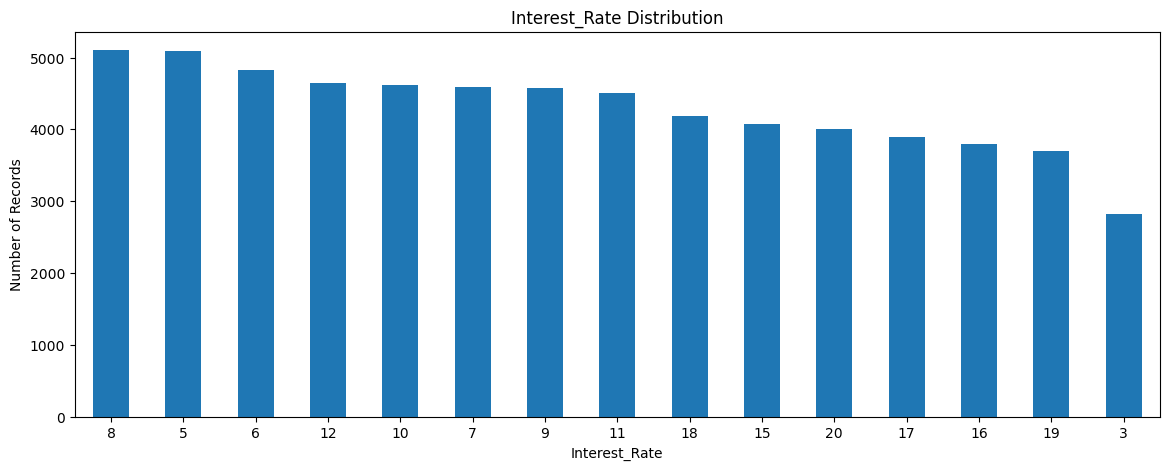

In [46]:
df['Interest_Rate'].value_counts().head(15).plot(kind = 'bar',figsize=(14,5))

plt.xlabel('Interest_Rate')
plt.ylabel('Number of Records')
plt.title('Interest_Rate Distribution')
plt.xticks(rotation=0)
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Feature: Num_of_Loan

In [48]:
df['Num_of_Loan'].unique()

array(['2', '1094', '4', '4_', '0', '0_', '3', '8', '-100', '8_', '1',
       '1_', '9', '7', '1222', '6', '5', '119', '3_', '6_', '2_', '9_',
       '143_', '7_', '5_', '1150', '351', '52', '95', '614', '504',
       '1241', '1496', '17', '966', '330', '290', '193', '520', '50',
       '1265', '352', '571', '190', '995', '55', '433', '590', '661',
       '313', '1027_', '92_', '1017', '904', '1132_', '1008', '49', '737',
       '546', '1096', '1461', '548', '939', '243', '1014', '924', '526',
       '1447', '1228', '1129', '968', '285', '1484', '716', '1236', '801',
       '809', '137', '208', '875', '1187', '621', '350', '911', '1023',
       '855', '802', '967', '1296', '640', '1131_', '639', '1365', '254',
       '1040', '141', '349', '659', '1480', '1259', '889', '70', '344',
       '898', '41', '1412', '1353', '720', '1154', '295', '238', '100',
       '54', '237', '868', '1214', '873', '33', '895', '1482', '1384',
       '182', '1289', '439', '563', '31', '597', '649', '1053', '

In [49]:
# Finding all special characters in the Num_of_Loan column
special_characters = set()

for value in df['Num_of_Loan']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Num_of_Loan' column:", special_characters)

Special characters in the 'Num_of_Loan' column: {'-', '_'}


In [50]:
# Let's remove these special characters from the Num_of_Loan column
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'[_-]', '', regex=True)

In [51]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [52]:
df['Num_of_Loan'].value_counts()

Num_of_Loan
3      15104
2      15032
4      14743
0      10930
1      10606
       ...  
420        1
492        1
228        1
292        1
777        1
Name: count, Length: 413, dtype: int64

Replacing the values of 'Num_of_Loan' values using Mode values of each customer, as there are certain values that are generally not possible like 777 loans.

In [53]:
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.mode().iloc[0])

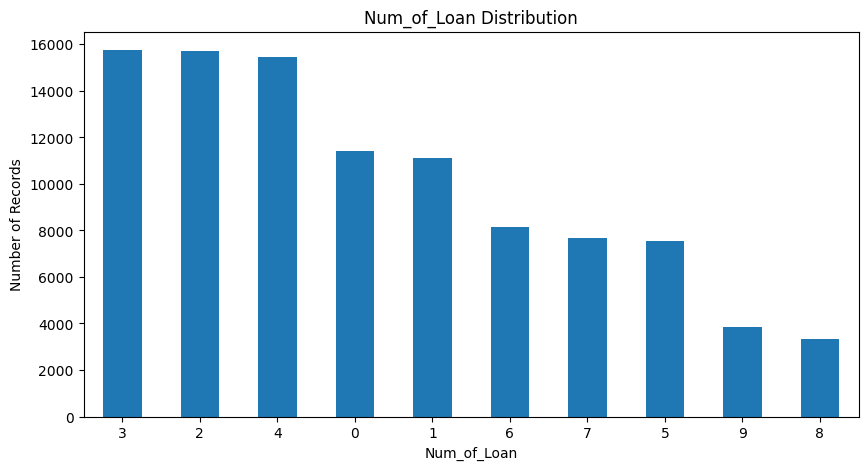

In [54]:
df['Num_of_Loan'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('Num_of_Loan')
plt.ylabel('Number of Records')
plt.title('Num_of_Loan Distribution')
plt.xticks(rotation=0)
plt.show()

#### Feature: Type_of_Loan

In [55]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                                                         1408
Credit-Builder Loan                                                                                                                                                   1280
Personal Loan                                                                                                                                                         1272
Debt Consolidation Loan                                                                                                                                               1264
Student Loan                                                                                                                                                          1240
                                                                                                                                    

In [56]:
df['Type_of_Loan'].isnull().sum()

np.int64(11408)

In [57]:
# Replacing the null values in 'Type_of_Loan' with 'Not Specified'
df['Type_of_Loan'].fillna('Not Specified', inplace=True)

Separating all the types of loans and encoding them by creating columns for each type of loan.

In [58]:
loan_types = df['Type_of_Loan'].str.replace('and', ',').str.get_dummies(', ')

In [59]:
loan_types

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0,1,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
99995,1,0,0,1,1,0,1,0,0
99996,1,0,0,1,1,0,1,0,0
99997,1,0,0,1,1,0,1,0,0
99998,1,0,0,1,1,0,1,0,0


In [60]:
# Concatenate the new columns with the original DataFrame and re order them.
df  = pd.concat([df, loan_types], axis=1)

In [61]:
# Re-ordering the columns
df.drop('Type_of_Loan', axis=1, inplace=True)

In [62]:
columns_order = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Auto Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
       'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']
df=df[columns_order]

#### Feature: Delay_from_due_date

In [64]:
df['Delay_from_due_date'].unique()

array([64, 57, 62, 67, 10,  5,  8,  3, 14, 19,  9, 27, 29, 12, 16,  6, 24,
        0, -4, -5,  1, 15, 23, 28, 18, 13, 11, 25, 50, 47, 48, 46,  7,  2,
       -3,  4, 30, 21, 17, 20, 22, 35, 40, 26, 31, 58, 59, 63, 37, 42, 43,
       38, 55, 41, 36, 52, 54, 53, 49, -2, 44, 39, 61, 34, 33, -1, 45, 51,
       60, 66, 56, 32, 65])

There are some negative values as well in this column. This denotes that the payment has been made before the due date.
Values are in the range of -5 to 67.

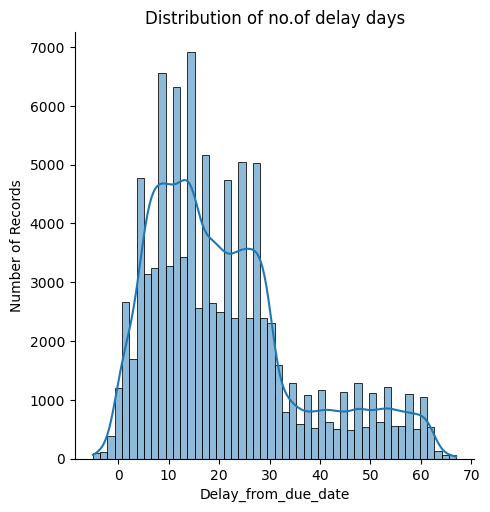

In [65]:
sns.displot(data=df, x=df['Delay_from_due_date'], kde=True, bins=50)
plt.xlabel('Delay_from_due_date')
plt.ylabel('Number of Records')
plt.title('Distribution of no.of delay days')
plt.xticks(rotation=0)
plt.show()

#### Feature: Num_of_Delayed_Payment

In [66]:
df['Num_of_Delayed_Payment'].unique()

array(['25', '26', '23', '28', '18', '16', '1749', '19', '7', '8', '9',
       '15', '13', nan, '12', '17_', '10', '20', '22', '1', '5', '2',
       '11', '17', '15_', '14', '3', '4', '6', '21', '8_', '11_', '0',
       '2230', '24', '18_', '-2', '19_', '1636', '20_', '-1', '16_',
       '921', '9_', '1766', '21_', '12_', '6_', '1_', '25_', '0_', '-3',
       '1572', '5_', '14_', '3_', '3162', '27', '1034', '4211', '4_',
       '2712', '1832', '22_', '3251', '7_', '867', '13_', '4106', '3951',
       '2216', '24_', '10_', '2_', '1640', '2142_', '754', '974', '1180',
       '1359', '320', '2250', '3621', '2438', '531', '3738', '2566',
       '719', '4326', '223', '1833', '3881', '23_', '439', '1614', '3495',
       '960', '4075', '3119', '4302', '121', '2081', '3894', '3484',
       '2594', '4126', '3944', '2553', '1820', '819', '27_', '3629',
       '2080', '1480', '2801', '359', '94', '473', '2072', '2604', '306',
       '1633', '4262', '2488', '2008', '2955', '1647', '1691', '468',
 

In [67]:
# Finding all special characters in the Num_of_Delayed_Payment column
special_characters = set()

for value in df['Num_of_Delayed_Payment']:
    if isinstance(value, str):  # Checks if the value is a string
        for char in value:
            if not char.isdigit():
                special_characters.add(char)
    elif isinstance(value, float) and not pd.isna(value):
        # Handles float values that are not NaN by converting them to strings
        value_str = str(int(value))
        for char in value_str:
            if not char.isdigit():
                special_characters.add(char)

print("Special characters in the 'Num_of_Delayed_Payment' column:", special_characters)

Special characters in the 'Num_of_Delayed_Payment' column: {'-', '_'}


In [68]:
# Let's remove these special characters from the Num_of_Delayed_Payment column
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'[_-]', '', regex=True)

In [69]:
# Changing the datatype to 'int'
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [70]:
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mode().iloc[0])

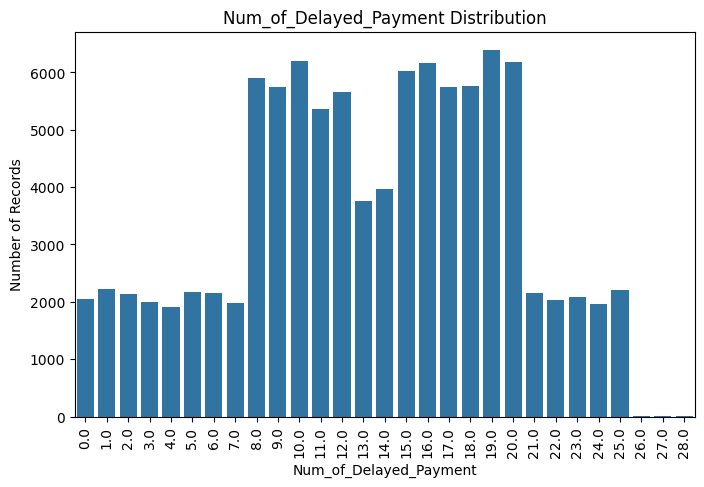

In [71]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['Num_of_Delayed_Payment'])
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Number of Records')
plt.title('Num_of_Delayed_Payment Distribution')
plt.xticks(rotation=90)
plt.show()

#### Feature: Changed_Credit_Limit

In [72]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
31.55       1
-5.65       1
24.27       1
-4.73       1
21.74       1
Name: count, Length: 3635, dtype: int64

In [73]:
df['Changed_Credit_Limit'].isnull().sum()

np.int64(0)

There are no null values in this column.

In [74]:
# Finding all special characters in the Changed_Credit_Limit column
special_characters = set()

for value in df['Changed_Credit_Limit']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Changed_Credit_Limit' column:", special_characters)

Special characters in the 'Changed_Credit_Limit' column: {'.', '-', '_'}


In [75]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '')

In [76]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', '0')

In [77]:
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.mode().iloc[0])

In [78]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

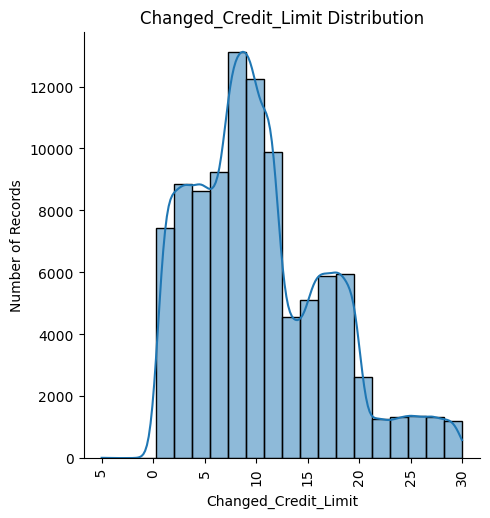

In [82]:
sns.displot(data=df, x=df['Changed_Credit_Limit'], kde=True, bins=20)
plt.xlabel('Changed_Credit_Limit')
plt.ylabel('Number of Records')
plt.title('Changed_Credit_Limit Distribution')
plt.xticks(rotation=90)
plt.show()

There are some negative values in this column which might indicate the percentage decrease in the Credit limit.

#### Feature: Num_Credit_Inquiries

In [84]:
df['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1355.0        1
1391.0        1
1430.0        1
856.0         1
57.0          1
Name: count, Length: 1223, dtype: int64

In [86]:
df['Num_Credit_Inquiries'].isnull().sum()

np.int64(1965)

In [87]:
# Grouping by 'Customer_ID' to check if there is more than one unique 'Num_Credit_Inquiries' value
customers_with_different_inquiries = df.groupby('Customer_ID')['Num_Credit_Inquiries'].nunique()

# Filtering to find customers with more than one unique value
customers_with_different_inquiries = customers_with_different_inquiries[customers_with_different_inquiries > 1]

# Display customers with different 'Num_Credit_Inquiries'
print(customers_with_different_inquiries)

Customer_ID
CUS_0x1000    2
CUS_0x1009    2
CUS_0x100b    3
CUS_0x1011    2
CUS_0x1015    2
             ..
CUS_0xfe4     2
CUS_0xfe5     2
CUS_0xff3     2
CUS_0xffc     2
CUS_0xffd     2
Name: Num_Credit_Inquiries, Length: 7830, dtype: int64


There are multiple customers who has different 'Num_Credit_Inquiries' values.

Replacing the the abnormal values using mode values of each customer.

In [90]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mode().iloc[0])

In [93]:
df['Num_Credit_Inquiries'].isnull().sum()

np.int64(0)

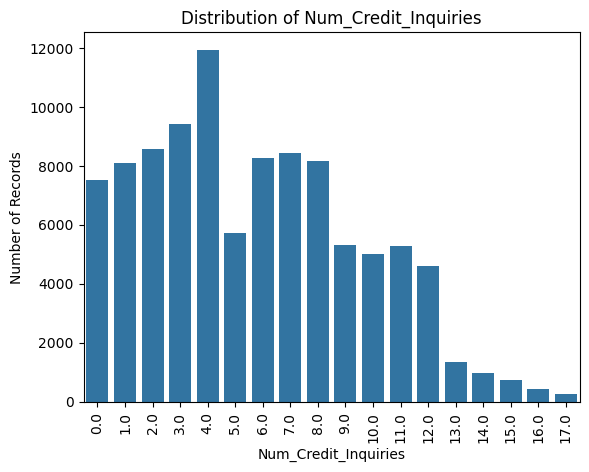

In [92]:
sns.countplot(data=df, x=df['Num_Credit_Inquiries'])
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Number of Records')
plt.title('Distribution of Num_Credit_Inquiries')
plt.xticks(rotation=90)
plt.show()

#### Feature: Credit_Mix

In [95]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

More than 20k values are blanks.

In [96]:
df['Credit_Mix'].isnull().sum()

np.int64(0)

There are no null values apart from the blanks. So, let's replace those values with NaNs.

In [97]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

Replacing those null values using the values from previous or next rows of that customers.

In [100]:
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill').fillna(method='bfill')

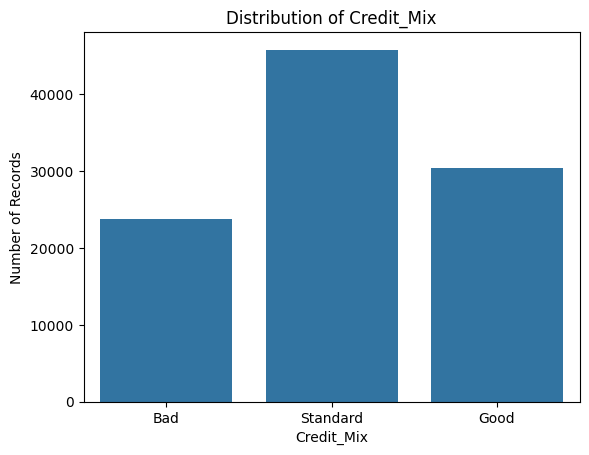

In [101]:
sns.countplot(data=df, x=df['Credit_Mix'])
plt.xlabel('Credit_Mix')
plt.ylabel('Number of Records')
plt.title('Distribution of Credit_Mix')
plt.xticks(rotation=0)
plt.show()

#### Feature: Outstanding_Debt

In [103]:
df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1360.45     24
1151.7      23
460.46      23
1109.03     23
288.32      16
            ..
370.22_      1
233.83_      1
743.65_      1
1278.12_     1
465.04_      1
Name: count, Length: 13178, dtype: int64

In [104]:
df['Outstanding_Debt'].isnull().sum()

np.int64(0)

There are no null values in this column.

In [105]:
# Finding all special characters in the Outstanding_Debt column
special_characters = set()

for value in df['Outstanding_Debt']:
    for char in value:
        if not char.isdigit():
            special_characters.add(char)

print("Special characters in the 'Outstanding_Debt' column:", special_characters)

Special characters in the 'Outstanding_Debt' column: {'.', '_'}


In [106]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')

In [107]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

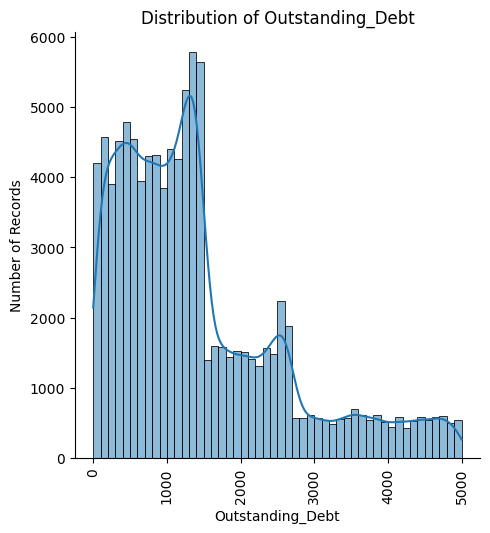

In [108]:
sns.displot(data=df, x=df['Outstanding_Debt'], kde=True, bins=50)
plt.xlabel('Outstanding_Debt')
plt.ylabel('Number of Records')
plt.title('Distribution of Outstanding_Debt')
plt.xticks(rotation=90)
plt.show()

#### Feature: Credit_Utilization_Ratio

In [110]:
df['Credit_Utilization_Ratio'].value_counts()

Credit_Utilization_Ratio
33.163023    2
26.407909    2
24.996239    1
40.286997    1
28.451199    1
            ..
42.501107    1
23.631611    1
25.211305    1
28.432276    1
32.330508    1
Name: count, Length: 99998, dtype: int64

In [111]:
df['Credit_Utilization_Ratio'].isnull().sum()

np.int64(0)

There are no null values in this column.

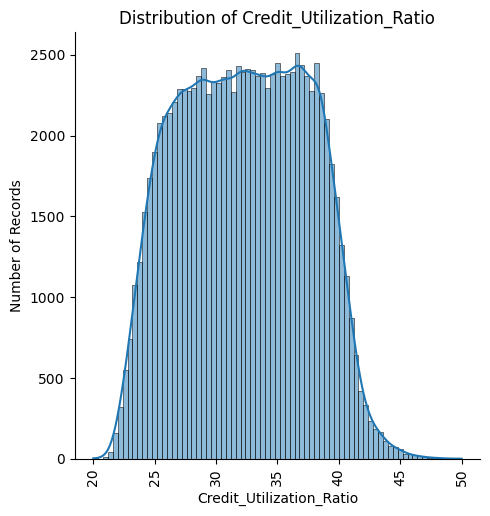

In [114]:
sns.displot(data=df, x=df['Credit_Utilization_Ratio'], kde=True, bins=75)
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Number of Records')
plt.title('Distribution of Credit_Utilization_Ratio')
plt.xticks(rotation=90)
plt.show()

Credit_Utilization_Ratio seems to be following a normal distribution.

#### Feature: Credit_History_Age

In [115]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [116]:
df['Credit_History_Age'].isnull().sum()

np.int64(9030)

Let's replace these null values using mode values of each customer.

In [117]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.mode().iloc[0])

In [118]:
df['Credit_History_Age'].isnull().sum()

np.int64(0)

The credit history values are in string format which is of no use. So, let's convert these into no.of months.

In [119]:
def convert_to_months(age_str):
    parts = age_str.split()
    years = int(parts[0])
    months = int(parts[3])
    total_months = (years * 12) + months
    return total_months

# Apply the function to the 'Credit_History_Age' column
df['Credit_History_Age_in_Months'] = df['Credit_History_Age'].apply(convert_to_months)

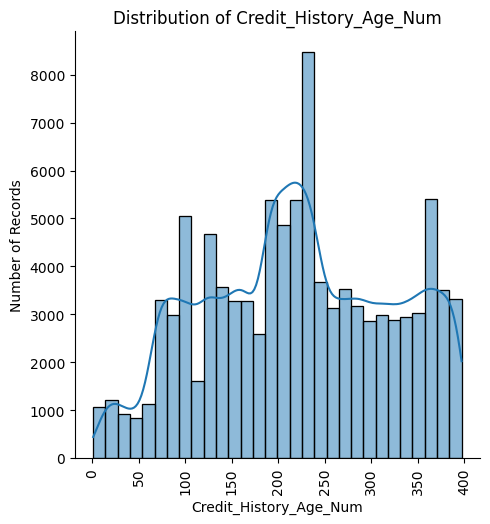

In [124]:
sns.displot(data=df, x=df['Credit_History_Age_in_Months'], kde=True, bins=30)
plt.xlabel('Credit_History_Age_Num')
plt.ylabel('Number of Records')
plt.title('Distribution of Credit_History_Age_Num')
plt.xticks(rotation=90)
plt.show()

In [126]:
# Dropping the original 'Credit_History_Age' column
df.drop('Credit_History_Age', axis=1, inplace=True)

#### Feature: Payment_of_Min_Amount

In [131]:
df['Payment_of_Min_Amount'].isnull().sum()

np.int64(0)

In [128]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [130]:
df['Payment_of_Min_Amount'].value_counts(normalize= True)*100

Payment_of_Min_Amount
Yes    52.326
No     35.667
NM     12.007
Name: proportion, dtype: float64

More than 52% has only paid the minimum amount needed.

#### Feature: Total_EMI_per_month

In [133]:
df['Total_EMI_per_month'].isnull().sum()

np.int64(0)

There are no null values in this column.

In [134]:
df['Total_EMI_per_month'].value_counts()

Total_EMI_per_month
0.000000        10613
61.099331           8
190.326311          8
22.683279           8
13.161860           8
                ...  
23809.000000        1
62722.000000        1
36418.000000        1
103.414072          1
68422.000000        1
Name: count, Length: 14950, dtype: int64

In [136]:
print(df['Total_EMI_per_month'].dtype)

float64


In [137]:
print(f"The minimum value of 'Total_EMI_per_month' is: {df['Total_EMI_per_month'].min()}")
print(f"The maximum value of 'Total_EMI_per_month' is: {df['Total_EMI_per_month'].max()}")

The minimum value of 'Total_EMI_per_month' is: 0.0
The maximum value of 'Total_EMI_per_month' is: 82331.0


In [142]:
df['Total_EMI_per_month'] = df.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.mode().iloc[0])

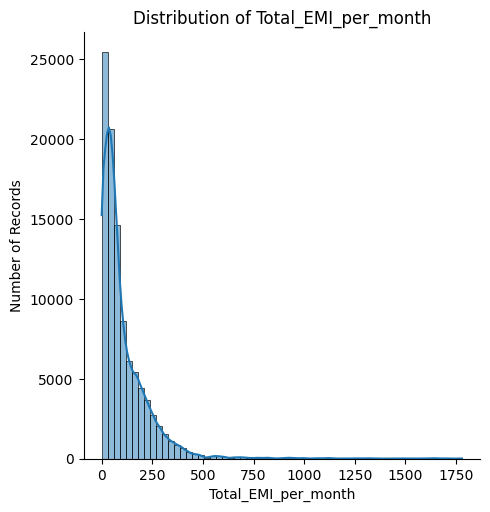

In [143]:
sns.displot(data=df, x=df['Total_EMI_per_month'], kde=True, bins=60)
plt.xlabel('Total_EMI_per_month')
plt.ylabel('Number of Records')
plt.title('Distribution of Total_EMI_per_month')
plt.xticks(rotation=0)
plt.show()